# Spark Funds Investment analysis
# By Aditya Kritwik

## Problem Statement

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Datasets

Name: companies.csv
Desc: Company details.

Name: rounds2.csv
Desc: Funding round details.

Name: mapping.csv
Desc: This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The purpose is to simplify the analysis into eight sector buckets, rather than trying to analyse hundreds of them.

### Importing libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
companies = pd.read_csv("companies.csv",encoding="ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2 = pd.read_csv("rounds2.csv",encoding="ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Understanding more about the dataframes

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Beautycon,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [6]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [9]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

##### As we can see above, there are few null values
##### Also the permalinks are not standard in both datasets --> Capital and small case in sporadic way

### Finding Unique companies in both datadrames

In [10]:
#decoding ascii characters and lowering the complete column to standardise between the 2 dataframes
companies['permalink'] = companies['permalink'].str.encode('utf_8').str.decode('ascii', 'ignore').str.lower()
print("There are {} unique permalinks in companies".format(companies.permalink.nunique()))

There are 66368 unique permalinks in companies


In [11]:
#decoding ascii characters and lowering the complete column to standardise between the 2 dataframes
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf_8').str.decode('ascii', 'ignore').str.lower()
print("There are {} unique permalinks in rounds2".format(rounds2.company_permalink.nunique()))

There are 66368 unique permalinks in rounds2


#### Creating Master Frame

In [12]:
# Creating Master Frame
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")
print("There are {} observations in the master frame".format(len(master_frame)))

master_frame.head()

There are 114949 observations in the master frame


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [13]:
#Finding companies which are present in rounds2 df but not in companies df.
master_frame.loc[master_frame.permalink.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


#### Checkpoint 1: Data Cleaning 1 -- master frame created

### Investment Type analysis
The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

    Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
    Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

 

##### Spark Funds wants to choose one of these four investment types for each potential investment they will make.

In [14]:
#Checking Frequency of every type of funding
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [15]:
# We can drop all rows which are not of type venture, seed, angel, private_equity
master_frame = master_frame[master_frame.funding_round_type.isin(['venture', 'seed', 'angel', 'private_equity'])]
master_frame.shape

(94397, 16)

In [16]:
master_frame.funding_round_type.value_counts()

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

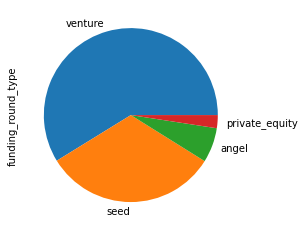

In [17]:
# checking to visualize the spread of funding_round_type
master_frame['funding_round_type'].value_counts().plot.pie()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

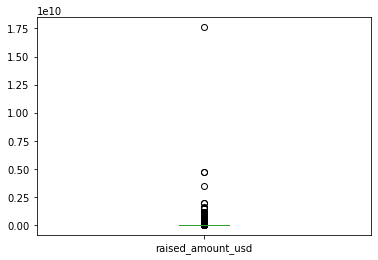

In [18]:
# checking for outliers
master_frame.raised_amount_usd.plot.box()
plt.show

In [19]:
master_frame.raised_amount_usd.describe()

count    8.062700e+04
mean     9.347995e+06
std      7.562940e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.975496e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [20]:
# assessing different aggfuncs on raised_Amount_usd
master_frame.groupby('funding_round_type').raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23603.0,7.198180e+05,2.221733e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


In [21]:
mfd = master_frame.groupby('funding_round_type').raised_amount_usd.describe()

In [22]:
# since there are quite a few outliers, the most represntative value of investment amount is the median for each of these types.
# mean is not considered since it gives a much higher value due to outliers.
venture_mrv = mfd.loc['venture','50%']
angel_mrv = mfd.loc['angel','50%']
private_equity_mrv = mfd.loc['private_equity','50%']
seed_mrv = mfd.loc['seed','50%']
print('The most representative value of the investment amount for angel type is {}'.format(angel_mrv))
print('The most representative value of the investment amount for private_equity type is {}'.format(private_equity_mrv))
print('The most representative value of the investment amount for seed type is {}'.format(seed_mrv))
print('The most representative value of the investment amount for venture type is {}'.format(venture_mrv))

The most representative value of the investment amount for angel type is 400000.0
The most representative value of the investment amount for private_equity type is 20000000.0
The most representative value of the investment amount for seed type is 275000.0
The most representative value of the investment amount for venture type is 5000000.0


In [23]:
# Finding ideal investment type
inv_dict = {'venture': venture_mrv, 'angel': angel_mrv, 'seed': seed_mrv, 'private_equity': private_equity_mrv}
for inv_type in inv_dict:
    if (inv_dict[inv_type] >= 5000000) and (inv_dict[inv_type] <= 15000000):
        print("Ideal investment type for Spark Funds is: {}".format(inv_type))

Ideal investment type for Spark Funds is: venture


In [24]:
# For further analysis, filtering the data so that it only contains the chosen investment type.
filtered_master = master_frame[master_frame['funding_round_type']=='venture']
filtered_master.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#### Checkpoint 2: Funding Type Analysis --> Venture type of investment is ideal. Data filtered.

### Country Analysis
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

 

    Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [25]:
# top 9 countries with highest raised amount
top9_countries = filtered_master.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).head(9)
top9 = filtered_master[filtered_master.country_code.isin(top9_countries.index)]

In [26]:
top9.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [27]:
#Based on https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language
print("Among the above countries, the Top 3(in terms of raised amount) English speaking countries in order are: USA, GBR, IND")
top9.shape

Among the above countries, the Top 3(in terms of raised amount) English speaking countries in order are: USA, GBR, IND


(48099, 16)

#### Checkpoint 3 :- Now we also know the three most investment-friendly countries and the most suited funding type for Spark Funds. Let us now focus on finding the best sectors in these countries.

### Sector analysis
When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

In [28]:
sect_map = pd.read_csv("mapping.csv")

In [29]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
top3 = top9[top9['country_code'].isin(['USA','GBR','IND'])]
top3.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19076
funded_at                      0
raised_amount_usd           2649
permalink                      0
name                           0
homepage_url                1961
category_list                384
status                         0
country_code                   0
state_code                    79
region                       173
city                         173
founded_at                  6938
dtype: int64

In [30]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [31]:
#Extracting the primary sector value
top3['primary_sector'] = top3['category_list'].apply(lambda x: str(x).split('|')[0])

In [32]:
sect_map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [33]:
sect_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [34]:
# dropping null category_list
sect_map=sect_map[~sect_map.category_list.isnull()]
sect_map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [35]:
def typo_correction(x):
    """Function to correct the mapping data.
    It can be observed from the data that at many places in the category_class column the 'na' is misprinted as '0'
    Eg. 'Analysis' is present as 'A0lysis'"""
    
    if '0' in x:
        if x.startswith("0"):                               # e.g Handling of 0vigation case with capital Na
            return x[:x.find('0')]+'Na'+x[x.find('0')+1:]
        elif x.endswith("0"):                               # ignores the 2.0 case with 0 at the end of the string since this is required
            return x
        else:                                               #all other typo cases
            return x[:x.find('0')]+'na'+x[x.find('0')+1:]
    else:
        return x

In [36]:
# calling the custom function to correct the category_list column in the mapping.
sect_map['category_list']=sect_map['category_list'].apply(typo_correction)

In [37]:
# mapping category_list to main_sector
sect_map = pd.melt(sect_map , id_vars=['category_list'],var_name=['main_sector'])
sect_map.head()

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [38]:
# Removing unwanted rows (where value = 0)
sect_map = sect_map[sect_map['value'] ==1]
sect_map.shape

(687, 3)

In [39]:
sect_map.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [40]:
# Removing unwanted column
sect_map.drop('value', axis = 1, inplace = True)

In [41]:
#merging top3 df with sect_map
top3=pd.merge(top3,sect_map,how="left",left_on="primary_sector",right_on="category_list")
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [42]:
#dropping unwanted column
top3=top3.drop('category_list_y',axis=1)

In [43]:
top3.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19076
funded_at                      0
raised_amount_usd           2649
permalink                      0
name                           0
homepage_url                1961
category_list_x              384
status                         0
country_code                   0
state_code                    79
region                       173
city                         173
founded_at                  6938
primary_sector                 0
main_sector                  396
dtype: int64

In [44]:
#List of primary sectors which have no main sectors in the master_frame
print(top3[top3.main_sector.isnull()].primary_sector.unique())

['nan' 'Natural Gas Uses' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Product Search'
 'Personal Finance' 'GreenTech' 'Retirement']


In [45]:
# Dropping these 396 null main_sectors
top3=top3[~(top3['main_sector'].isnull())]

In [46]:
top3.main_sector.isnull().sum()

0

In [47]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"


#### Checkpoint 4: Sector Analysis 1 --> A merged dataframe with each primary sector mapped to its main sector (the primary sector is present in a separate column) is available(top3)

### Sector Analysis 2
Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

In [48]:
# creating d1 for USA
d1 = top3[(top3['country_code'] == 'USA') & ((top3['raised_amount_usd'] >= 5000000) & (top3['raised_amount_usd'] <= 15000000))]
d1.shape

(12063, 18)

In [49]:
# creating d2 for GBR
d2 = top3[(top3['country_code'] == 'GBR') & ((top3['raised_amount_usd'] >= 5000000) & (top3['raised_amount_usd'] <= 15000000))]
d2.shape

(621, 18)

In [50]:
# creating d3 for IND
d3 = top3[(top3['country_code'] == 'IND') & ((top3['raised_amount_usd'] >= 5000000) & (top3['raised_amount_usd'] <= 15000000))]
d3.shape

(328, 18)

In [51]:
#total sum raised by investments in USA
d1.raised_amount_usd.sum()

107757097294.0

In [52]:
#number of investments in USA
d1.raised_amount_usd.count()

12063

In [53]:
#sector_analysis for d1
d1_inv_sum = d1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).head()
d1_inv_count = d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head()
print("Sum : {}, \n\n Count ={}".format(d1_inv_sum,d1_inv_count))

Sum : main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64, 

 Count =main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64


In [54]:
#Finding the highest invested company among the 1st Top sector of the country.(C1)
d1[d1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [55]:
#Finding the highest invested company among the 2nd Top sector of the country.(C1)
d1[d1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [56]:
#total sum raised by investments in GBR
d2.raised_amount_usd.sum()

5379078691.0

In [57]:
#number of investments in GBR
d2.raised_amount_usd.count()

621

In [58]:
#sector_analysis for d2
d2_inv_sum = d2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).head()
d2_inv_count = d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head()
print("Sum : {}, \n\n Count ={}".format(d2_inv_sum,d2_inv_count))

Sum : main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Name: raised_amount_usd, dtype: float64, 

 Count =main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64


In [59]:
#Finding the highest invested company among the 1st Top sector of the country.(C2)
d2[d2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [60]:
#Finding the highest invested company among the 2nd Top sector of the country.(C2)
d2[d2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [61]:
#total sum raised by investments in IND
d3.raised_amount_usd.sum()

2949543602.0

In [62]:
#number of investments in IND
d3.raised_amount_usd.count()

328

In [63]:
#sector_analysis for d3
d3_inv_sum = d3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).head()
d3_inv_count = d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head()
print("Sum : {}, \n\n Count ={}".format(d3_inv_sum,d3_inv_count))

Sum : main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Entertainment                              2.808300e+08
Manufacturing                              2.009000e+08
Name: raised_amount_usd, dtype: float64, 

 Count =main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64


In [64]:
#Finding the highest invested company among the 1st Top sector of the country.(C3)
d3[d3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [65]:
#Finding the highest invested company among the 2nd Top sector of the country.(C3)
d3[d3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

#### Checkpoint 5 :

Three data frames D1, D2 and D3 created
Based on the analysis of the sectors, Sparks funds should invest in Others and Social, Finance, Analytics, Advertising sectors in all the 3 countries.

## Plots

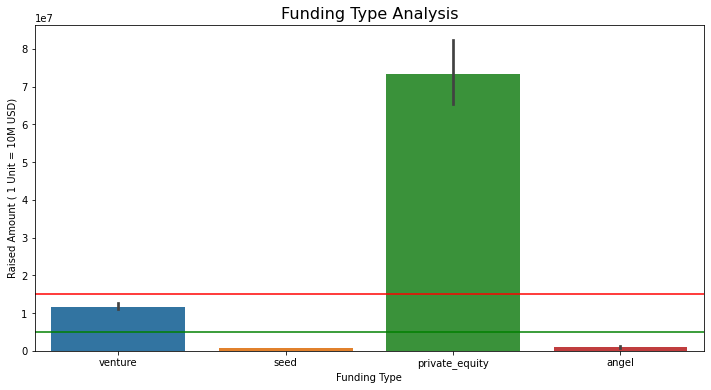

In [66]:
# bar plot for investment type with mean
plt.figure(figsize=(12,6))
a=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame,estimator=np.mean)
a.set(xlabel='Funding Type', ylabel='Raised Amount ( 1 Unit = 10M USD)')
a.set_title('Funding Type Analysis',fontsize =16)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

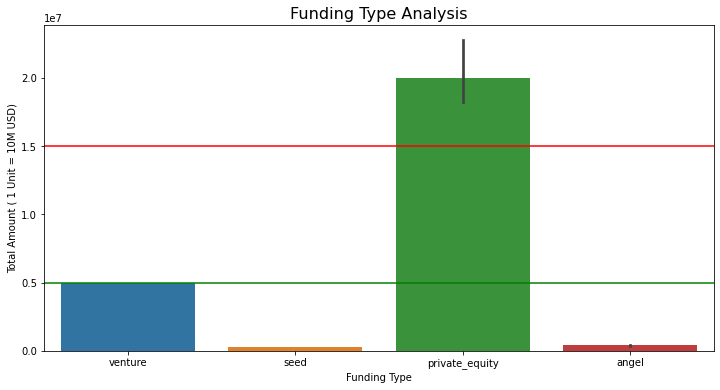

In [67]:
# bar plot for investment type with median
plt.figure(figsize=(12,6))
a=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame,estimator=np.median)
a.set(xlabel='Funding Type', ylabel='Total Amount ( 1 Unit = 10M USD)')
a.set_title('Funding Type Analysis',fontsize =16)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

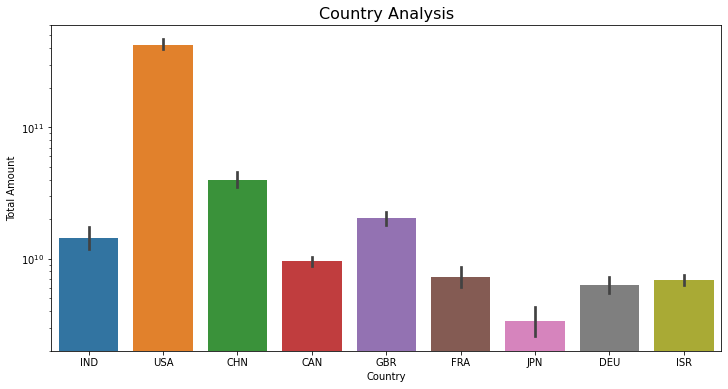

In [68]:
# bar plot for country analysis
plt.figure(figsize=(12,6))
b=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum)
b.set_yscale('log')
b.set(xlabel='Country', ylabel='Total Amount')
b.set_title('Country Analysis',fontsize =16)
plt.show()

In [69]:
US = d1[d1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
GB = d2[d2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
IN = d3[d3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]
conclusion_plot = US.append(GB).append(IN)

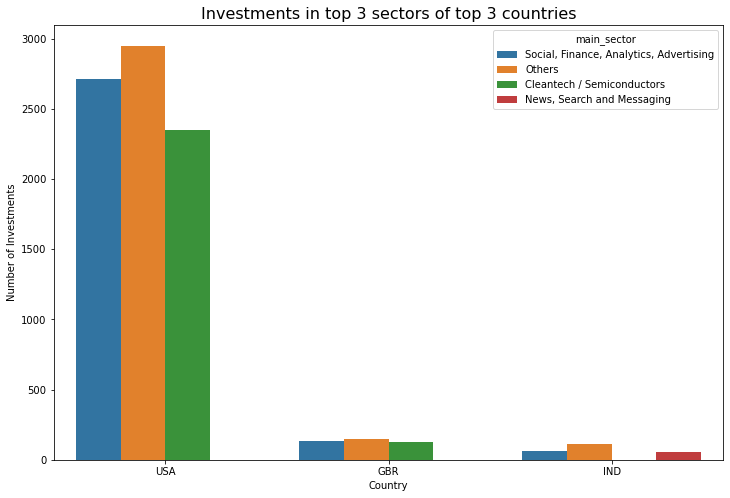

In [70]:
plt.figure(figsize=(12, 8))

#hue="categorical_variable"
c=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=conclusion_plot,estimator=lambda x: len(x))
c.set(xlabel='Country', ylabel='Number of Investments')
c.set_title('Investments in top 3 sectors of top 3 countries',fontsize =16)
plt.show()

### Checkpoint 6: Plots
    A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   
    A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                     
    A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.